<center><h2> Jackson Problem 3.3 </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS" by RH Landau, MJ Paez, and CC Bordeianu (deceased). Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2020. Please respect copyright & acknowledge our work."""

<p>
(Jackson 3.3) A visualization of the potential of a  thin, flat, conducting, circular disk of radius $R$ at fixed potential $V$ with charge density proportional to $(R^2-\rho^2)^{-1/2}$ 
$$
\Phi(r,\theta, \phi) = \frac{2V}{\pi}\frac{R}{r}\sum_{\ell=0}^{\infty} \frac{(-1)^\ell}{2\ell +1} \Bigl ( \frac{R}{r}\Bigr )^{2\ell} P_{2\ell}(\cos \theta)
$$ 

<IPython.core.display.Javascript object>


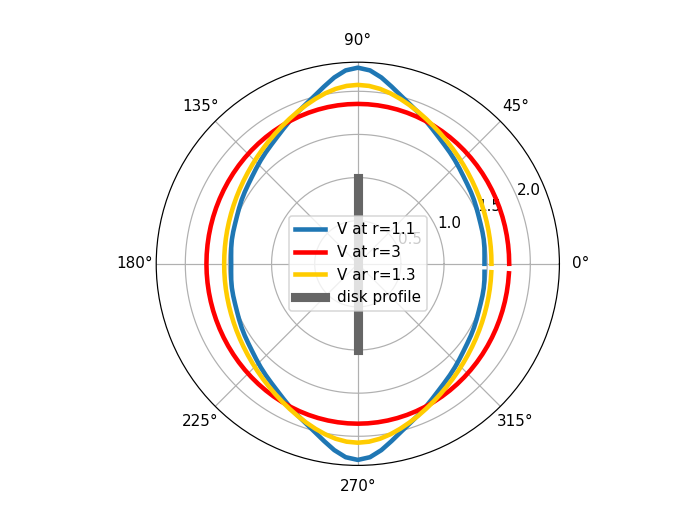

In [1]:
% matplotlib notebook
from matplotlib.pyplot import  figure, show, rc
import numpy as np

def legendre(n,x):  # finds  Legendre polymonial orden n evaluated at x
    if(n == 0):     p = 1         # Po  = 1
    elif(n == 1):   p = x         # P1 = x
    else:
        p0 = 1
        p1 = x
        for m in range(1,n):
            p2 = (((2*m+1)*x*p1-m*p0)/(m+1))  # recurrence relation
            p0 = p1
            p1 = p2
            p = p2
    return p

V = np.pi                                 
R = 1                      # disk radius
r = 1.1                    # find potential at that r
const =  2*V*R/(np.pi*r)
x = [0]*(100)              # reserve 100 spacen in mem.
xx = [0]*(100)
xxx = [0]*(100)
incr = 2*np.pi/100.
th = [np.pi/2,3*np.pi/2] # to plot disk profile
st = [1,1]         # to plot radius disk- profile
mmax = 10          # number of terms

def potential(r,theta):  # computes potential
    
    summ = 0
    for m in range(0,mmax):
        twom = 2*m
        w = np.cos(theta)
        leg = legendre(twom,w)
        term = ((-1)**m) *(R/r)**twom*leg/(twom+1)
        summ = summ+term
    pot = summ*const            # returns potential
   
    return pot
i = 0  

for theta in np.arange(0,2*np.pi,incr):
    x[i] = potential(r,theta)     # potential is the r coord
    xx[i] = potential(3,theta)
    xxx[i] = potential(1.3,theta)
    i+ = 1
    
fig = figure()
ax = fig.add_subplot(111, projection = 'polar')
theta =  np.arange(0,2*np.pi,incr)
ax.plot(theta,x,label = 'V at r = 1.1',linewidth = 3)
ax.plot(theta,xx,color = 'r',label = 'V at r = 3',linewidth = 3)
ax.plot(theta,xxx,linewidth = 3,label = 'V ar r = 1.3',color = (1,0.8,0))
ax.plot(th,st,linewidth = 6,color = (0.4,0.4,0.4),label = "disk profile")
ax.legend()
show()     